In [44]:
import pickle as pkl
# word_dictionary from CMB news
with open('word_dict.pkl', 'rb') as f:
    word_dict = pkl.load(f)
# word_list: segmentation result
with open('word_list.pkl', 'rb') as f:
    word_list = pkl.load(f)
    
len(word_dict), len(word_list)

(38529, 2188)

In [45]:
len([w for w in word_dict if word_dict[w] >= 5])

11922

In [46]:
word_dict_filtered = {}
for k, v in word_dict.items():
    if v >=5:
        word_dict_filtered[k] = v
len(word_dict_filtered)

11922

In [47]:
word_list[0]

['解决',
 'B2B',
 '电商',
 '支付',
 '痛点',
 '招行',
 '落地',
 '全国',
 '首笔',
 '票付',
 '通',
 '业务',
 '1',
 '解决',
 'B2B',
 '电商',
 '支付',
 '痛点',
 '招行',
 '落地',
 '全国',
 '首笔',
 '票付',
 '通',
 '业务',
 '2019',
 '年',
 '1',
 '月',
 '26',
 '日',
 '招商银行',
 '联合',
 '中建',
 '电商',
 '有限责任',
 '公司',
 '中国石油化工集团',
 '有限公司',
 '在',
 '基于',
 '上海',
 '票据',
 '交易所',
 '下',
 '称票',
 '交所',
 '票付',
 '通',
 '产品',
 '的',
 '票据',
 '线上',
 '支付',
 '业务',
 '中拔',
 '得',
 '头筹',
 '将',
 '全国',
 '首单',
 '交易',
 '首日',
 '最大',
 '单笔',
 '交易额',
 '两项',
 '桂冠',
 '收入',
 '囊中',
 '这',
 '标志',
 '着',
 '招商银行',
 '与',
 '世界',
 '500',
 '强',
 '行业龙头',
 '企业',
 '联手',
 '打造',
 '票付',
 '通',
 '业务',
 '新',
 '模式',
 '获得',
 '全面',
 '成功',
 '在',
 '国内',
 '同业',
 '中',
 '率先',
 '进入',
 'B2B',
 '电商',
 '票据',
 '支付',
 '服务',
 '产业',
 '互联网',
 '新',
 '领域',
 'B2B',
 '电商',
 '平台',
 '引入',
 '票据',
 '支付',
 '是',
 '大势所趋',
 '以',
 '票据',
 '为',
 '载体',
 '的',
 '支付',
 '结算',
 '方式',
 '便捷',
 '安全',
 '融资',
 '高效',
 '且',
 '成本',
 '较',
 '低',
 '逐步',
 '为',
 '各行各业',
 '所',
 '广泛',
 '接受',
 '招商银行',
 '基于',
 '票交所',
 '票付',
 '通',
 '产品',
 '提供',
 '的',

In [48]:
word_list_filtered = []
for sentence in word_list:
    sentence_filtered = [w for w in sentence if w in word_dict_filtered]
    word_list_filtered.append(sentence_filtered)

In [49]:
len(word_list_filtered[0]), len(word_list[0])

(644, 757)

In [50]:
import gensim

model = gensim.models.Word2Vec(word_list_filtered, sg=1, min_count = 1,  
                              size = 100, window = 5, negative=3, sample=0.001, hs=1)

In [51]:
word_vectors = {}
for w in word_dict_filtered:
    word_vectors[w] = model.wv.get_vector(w)
count = 0
with open('cmb_emb.tsv', 'w') as f:
    f.write('word\t' + 'e\t'*100 + '\n')
    for w in word_vectors:
        line = w + '\t' + '\t'.join(list(map(str, word_vectors[w].tolist()))) + '\n'
        f.write(line)
        count += 1
        if count == 10000: break

In [52]:
model.wv.similar_by_word('个贷')

[('新增', 0.6028885841369629),
 ('小微贷', 0.6004335284233093),
 ('无贷户', 0.5794074535369873),
 ('信贷业务', 0.5738548040390015),
 ('\ue010', 0.5702165961265564),
 ('并入', 0.5593197345733643),
 ('对公', 0.5561645030975342),
 ('两小', 0.5527912378311157),
 ('储蓄存款', 0.5512969493865967),
 ('负债', 0.5432725548744202)]

In [53]:
word_count = [(v, k) for k,v in word_dict_filtered.items()]

In [54]:
word_count.sort(reverse=True)

In [58]:
for n ,w in word_count[1:30]:
    print(w, n)
    similar_words = [v[0] for v in model.wv.similar_by_word(w)]
    print(similar_words)
    print()

在 15476
['例会', '招商银行', '一个多月', '招行', '亮出', '成绩斐然', '如是说', '居首', '获知', '浦东']

招行 13804
['招商银行', '该行', '亮出', '齐发', '联交所', '在', '银行', '成绩斐然', '预告', '谋划']

银行 11866
['商业银行', '银行业务', '业务', '招行', '其', '各家', '金融机构', '外资银行', '国内', '我们']

招商银行 11284
['招行', '该行', '余彦君', '\u3000', '亮出', '日前', '晶报讯', '年', '在', '一职']

企业 7910
['生产型', '煤炭企业', '跨国企业', '受益人', '研究成果', '第七届', '华尊奖', '新星', '金融机构', '央企']

客户 7449
['照顾', '残障', '满足', '需求', '区隔', '服务', '洞悉', '私密', '高端', '出发点']

为 6366
['以', '计', '全折', '2.4', '1.83', '上缴', '比值', '筹资', '2.29', '税后']

业务 6034
['中间业务', '银行业务', '批发', '对私', '稳步发展', '大力发展', '加码', '粤港', '业务收入', '对公']

年 6028
['日', '月', '日止', '去年', '今年', '第八', '中旬', '成绩斐然', '并于', '招商银行']

服务 5739
['金融服务', '专心', '于高端', '提供', '专业', '优质服务', '锐意', '洞悉', '客户', '私密']

中国 5118
['成就奖', '华商', '金紫荆', '获颁', '人物奖', '风云人物', '№', '中国社会科学院', '深商', '连获']

等 4975
['以及', '包括', '如', '水务', '在内', '财税', '代付', '人员培训', '过桥', '代收']

发展 4868
['助推器', '迫切要求', '抓住机遇', '必然选择', '关键时期', '轨道', '吉林省', '日益突出', '必由之路', '调整结构']

与 4783


In [60]:
word_num = 0
for sentence in word_list_filtered:
    word_num += len(sentence)
word_num

945613

In [66]:
import jieba.analyse
keywords_list = set()
for sentence in word_list_filtered:
    tags = jieba.analyse.extract_tags(''.join(sentence), topK=5)
    for t in tags: keywords_list.add(t)
keywords_list

{'代表',
 '财险',
 '巨鳄',
 '银企',
 '筹资',
 '郎朗',
 '发行商',
 '等额',
 '蛇口',
 '银期',
 '光明',
 '焦程',
 '积极探索',
 '跻伟',
 '一卡通',
 '代客',
 '本期',
 '海航',
 '罗保铭',
 'CBSApp3.0',
 '风云人物',
 '搜狐',
 '网联',
 '境内外',
 '质押',
 '童先生',
 '伪冒',
 'CFO',
 '接听',
 '前位',
 '去年同期',
 '贷款',
 '圈地',
 '自主',
 '庆祝',
 '需求',
 '告白',
 '指标',
 '天虹',
 '中央电视台',
 '首尔',
 '价值观',
 '预增',
 '充值',
 '文化',
 '金桥',
 '卓越',
 '网络',
 '研发',
 '准备金',
 '小时',
 '非常',
 '体验',
 '服务',
 '一起',
 '金融机构',
 '指数',
 '双降',
 '金融时报',
 '火炬手',
 '总决赛',
 '产业链',
 '深圳',
 '雪人',
 '王红彦',
 '四大行',
 '五重',
 '第一',
 '五周年',
 '精英',
 '免税店',
 '五百强',
 '人民银行',
 '流金',
 '苏州',
 '海外投资',
 '东方航空',
 '投放',
 '利润总额',
 '离岸',
 '美国',
 '宝宝',
 '银联',
 '港元',
 '排名',
 '代表处',
 '开证',
 '关怀',
 '小王',
 '进一步',
 '一带',
 '优势互补',
 '跃升',
 '2.5%',
 '面对现实',
 '国有企业',
 '私行',
 '王书长',
 '下放',
 '校园卡',
 '生活',
 '平安',
 'VIP',
 '有限公司',
 '不确定性',
 '到期',
 '扶贫开发',
 '郑州',
 '浙商',
 '支行',
 '工作',
 '颁奖典礼',
 '用款',
 '亿张',
 '适用',
 '董事长',
 '发售',
 '传播',
 '承销',
 '超过',
 '覆盖率',
 '城市',
 '领先',
 '启动',
 '收益',
 '保险',
 '消费者',
 '税前',
 '旅游',
 '财资',
 '工作室',
 '医疗',
 '网盾',


In [75]:
# generate idf file
import math
idf_dict = {}
all_dict = {}
for line in word_list_filtered:
    temp_dict = {}
    total += 1
#     cut_line = jieba.cut(line, cut_all=False)
    for word in line:
        temp_dict[word] = 1
    for key in temp_dict:
        num = all_dict.get(key, 0)
        all_dict[key] = num + 1
for key in all_dict:
#     w = key.encode('utf-8')
    p = '%.10f' % (math.log10(total/(all_dict[key] + 1)))
    idf_dict[key] = p
idf_dict

{'解决': '1.5490588426',
 'B2B': '3.0390173220',
 '电商': '2.6588060803',
 '支付': '1.4743512577',
 '痛点': '2.7167980273',
 '招行': '0.7362536135',
 '落地': '2.3669194641',
 '全国': '1.2846689863',
 '首笔': '2.7379873263',
 '票付': '3.7379873263',
 '通': '2.2129425193',
 '业务': '0.9523016581',
 '年': '0.8770507056',
 '月': '0.9393366809',
 '日': '1.0714693458',
 '招商银行': '0.7190788820',
 '联合': '1.6849088829',
 '中建': '3.4369573307',
 '有限责任': '2.6965946412',
 '公司': '1.2058702101',
 '有限公司': '1.8403602350',
 '在': '0.7313073986',
 '基于': '1.6735293371',
 '上海': '1.5113874211',
 '票据': '2.0219839827',
 '交易所': '2.3762594903',
 '下': '1.1570623507',
 '产品': '1.0308431380',
 '线上': '2.3147414524',
 '得': '1.8543258912',
 '头筹': '2.8928892863',
 '将': '0.8776493198',
 '首单': '2.8085684006',
 '交易': '1.4402268152',
 '首日': '2.9250739697',
 '最大': '1.4468405646',
 '单笔': '2.6772894860',
 '交易额': '2.6410773133',
 '两项': '2.2608660716',
 '桂冠': '2.8928892863',
 '收入': '1.5504666055',
 '囊中': '3.2608660716',
 '这': '1.1570623507',
 '标志': '1.8

In [77]:
with open('idf.txt', 'w') as f:
    for k, v in idf_dict.items():
        f.write(k+' '+v+'\n')

    

In [92]:
jieba.analyse.set_idf_path("idf.txt");
keywords_list = set()
for sentence in word_list_filtered:
    tags = jieba.analyse.textrank(''.join(sentence), topK=5)
    for t in tags: keywords_list.add(t)
keywords_list

{'面向',
 '代表',
 '财险',
 '等额',
 '发行商',
 '蛇口',
 '银期',
 '光明',
 '成绩',
 '跻伟',
 '代客',
 '网联',
 '质押',
 '接听',
 '前位',
 '去年同期',
 '贷款',
 '自主',
 '庆祝',
 '需求',
 '告白',
 '指标',
 '上涨',
 '预增',
 '文化',
 '青春',
 '帮助',
 '网络',
 '小时',
 '体验',
 '服务',
 '金融机构',
 '指数',
 '总决赛',
 '深圳',
 '精英',
 '免税店',
 '苏州',
 '民生',
 '方法',
 '投放',
 '教育部',
 '美国',
 '离岸',
 '利润总额',
 '银联',
 '排名',
 '代表处',
 '开证',
 '一带',
 '办事',
 '查询',
 '国有企业',
 '私行',
 '校园卡',
 '生活',
 '有限公司',
 '不确定性',
 '郑州',
 '支行',
 '工作',
 '适用',
 '公众',
 '记者',
 '董事长',
 '发售',
 '密码',
 '传播',
 '超过',
 '承销',
 '覆盖率',
 '城市',
 '领先',
 '启动',
 '收益',
 '保险',
 '消费者',
 '调控',
 '理念',
 '旅游',
 '财资',
 '医疗',
 '网盾',
 '经营',
 '暴利',
 '亚洲',
 '赞助',
 '小鸟',
 '科技部',
 '信用证',
 '港股',
 '票据通',
 '出席',
 '网点',
 '援助',
 '获悉',
 '非流通股',
 '场景',
 '黄金',
 '网络广告',
 '分店',
 '投融资',
 '灾区',
 '福州',
 '看到',
 '外汇业务',
 '联动',
 '弹性',
 '商务',
 '金融市场',
 '面对',
 '融合',
 '包括',
 '全球',
 '保护环境',
 '全球化',
 '发票',
 '经理',
 '青海',
 '两江',
 '信用社',
 '转账',
 '货运',
 '贵宾',
 '百货',
 '现金流量',
 '内地',
 '计算器',
 '增速',
 '一键',
 '评委会',
 '校名',
 '交易系统',
 '挂钩',
 '女士',
 '电网',
 '大家'

In [96]:
# keywords clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

clu_word_list = []
clu_vector_list = []
for k in keywords_list:
    if k not in word_vectors: continue
    clu_word_list.append(k)
    clu_vector_list.append(word_vectors[k])
labels = []
scores = []
for n in range(2, 20):
    clusterer = KMeans(n_clusters=n, random_state=10)
    cluster_labels = clusterer.fit_predict(clu_vector_list)
    score = silhouette_score(clu_vector_list, cluster_labels)
    print("For n_clusters =", n,
          "The average silhouette_score is :", score)
    labels.append(cluster_labels)
    scores.append(score)
    

For n_clusters = 2 The average silhouette_score is : 0.04954284
For n_clusters = 3 The average silhouette_score is : 0.04754466
For n_clusters = 4 The average silhouette_score is : 0.045693282
For n_clusters = 5 The average silhouette_score is : 0.047136635
For n_clusters = 6 The average silhouette_score is : 0.049016237
For n_clusters = 7 The average silhouette_score is : 0.04878225
For n_clusters = 8 The average silhouette_score is : 0.04668815
For n_clusters = 9 The average silhouette_score is : 0.046272915
For n_clusters = 10 The average silhouette_score is : 0.04248975
For n_clusters = 11 The average silhouette_score is : 0.0428256
For n_clusters = 12 The average silhouette_score is : 0.043372568
For n_clusters = 13 The average silhouette_score is : 0.044273116
For n_clusters = 14 The average silhouette_score is : 0.0440741
For n_clusters = 15 The average silhouette_score is : 0.043860823
For n_clusters = 16 The average silhouette_score is : 0.046155754
For n_clusters = 17 The ave

In [103]:
# TODO
# manually select num_cluster = 9
for i in range(19):
    print('cluster ', i, ': ', [k for k, l in zip(clu_word_list,labels[-1]) if l == i])
    

cluster  0 :  ['国有企业', '亚洲', '评委会', '称号', '环球', '经理人', '英国', '高峰论坛', '评选', '大会', '发布', '证券时报', '勋章', '获选', '呼叫', '媒体', '获奖', '财经', '报纸广告', '测评', '百强', '知识型', '圆桌', '尊敬', '颁奖', '成分股', '评奖', '峰会', '揭晓', '世界级', '公众形象', '入围', '领军人物', '案例', '殊荣', '影响力', '蝉联', '周刊', '年度人物', '提名', '理财师', '科学奖', '协会', '欧洲', '银行家', '货币', '年度', '当选', '致敬', '候选', '获评', '优秀奖', '入选', '奖项', '投票', '杂志', '评选活动', '领袖', '排行榜', '获奖者', '结果', '示范', '至爱', '中国', '实验室', '企业家', '英国皇家', '优选', '上榜', '领导力']
cluster  1 :  ['方法', '办事', '工作', '外汇业务', '授权', '优先', '条件', '建议', '代码', '运作', '押金', '通道', '保障', '征信', '公积金', '试点', '主体', '培训', '收费', '组织', '先进性', '科学', '承诺', '内容', '符合', '指引', '实施', '合理', '审贷', '监管', '权益', '拍卖', '风险管理', '信用', '审批', '加强', '授信', '认定', '保护', '部门', '核销', '出台', '信贷', '完善', '专项', '保证', '小企业', '防范', '社会保障', '合规', '呆账', '暂行办法', '事项', '风险', '处置', '提案', '体系', '标准', '住房', '信息', '规范', '应当', '管理', '知识产权', '抵债', '控股公司', '失信', '规定', '相关', '基本', '议案', '补贴', '改善', '担保', '税收', '计量', '条例', '调节', '准备', '发放', '曲靖市', '建立', '引导', '政策

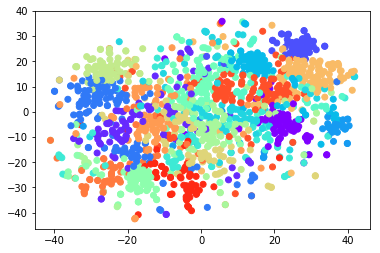

In [102]:
from sklearn.manifold import TSNE
import matplotlib.cm as cm
import numpy as np

tsne = TSNE()
plot_clu = tsne.fit_transform(clu_vector_list)
import matplotlib.pyplot as plt
colors = cm.rainbow(np.linspace(0, 1, 20))
x, y = [p[0] for p in plot_clu], [p[1] for p in plot_clu]
col = [colors[l] for l in labels[-1]]
plt.scatter(x, y, c=col)

In [95]:
jieba.analyse.set_idf_path("idf.txt");
i_keywords = jieba.analyse.extract_tags(''.join(word_list_filtered[0]),topK=5)
t_keywords = jieba.analyse.textrank(''.join(word_list_filtered[0]),topK=5)
print(i_keywords, t_keywords)

['票据', '电商', '票付', '平台', '支付'] ['票据', '平台', '支付', '电商', '企业']
